**Objective and Data Description**

  1. I sourced this dataset from Kaggle. My dataset is called 'Student Performance'. It tracks the grades of students in addition to many factors that may affect their academic performance, such as their sex, their class attendance, and how often they study.

  2. My research object is to learn to utilize the Decision Trees algorithm on my student performance dataset and see if it performs well. Since this dataset contains many categorical variables, I think that it will be a good candidate to test the Decision Trees algorithm on.

  3. My research question is to predict student's grades using the best version of a decision trees model.



**Statistical and Numerical Summaries**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#Load in data
import pandas as pd
import io
from google.colab import files
uploaded_files = files.upload()
print(uploaded_files.keys())
studentdata = pd.read_csv(io.BytesIO(uploaded_files['StudentsPerformance.csv']))

Saving StudentsPerformance.csv to StudentsPerformance.csv
dict_keys(['StudentsPerformance.csv'])


**Data Preparation**

In [14]:
# Divide data into predictor features vector and the label of the trget variable 'Risk'
studentdata = studentdata.drop('STUDENT ID', axis=1)
X = pd.DataFrame(studentdata)
X = X.iloc[:,0:13]
y = studentdata['GRADE']
#print(X)
#print(y)

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Train and Test Data**

In [1]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier

# Creating an instance of the Decision Tree
tree = DecisionTreeClassifier(random_state=0)
# Fiting the training data to the model
tree.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

NameError: name 'X_train' is not defined

In [16]:
# Improving the Decision Tree accuracy by increasing the depth.
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.466
Accuracy on test set: 0.207


In [17]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.08307534 0.09289313 0.10169984 0.16322909 0.         0.08712313
 0.         0.         0.0699237  0.10686978 0.11304812 0.08758528
 0.09455258]


**Feature Importance and techniques to improve performance**

13


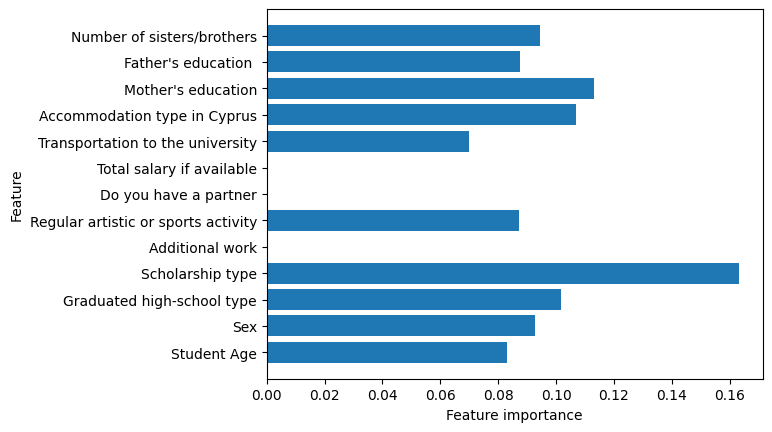

In [18]:
# Creating a function to generate feature importance and plot it.

def plot_feature_importances_heartattack(model):
# extractibg the number of predictive feature variables(columns)
    n_features = X.shape[1]
    print(n_features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Calling the function to extract feature importance and passing the model named tree (constructed earlier) into it.

plot_feature_importances_heartattack(tree)

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# StratifiedKFold is a variation of k-fold which returns stratified folds: each set
# contains approximately the same percentage of samples of each target class as the complete set.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
# number of trees =100, maximum depth = 5
forest = RandomForestClassifier(max_depth=5,n_estimators=100, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.870
Accuracy on test set: 0.270


**Testing Random Forest**

Accuracy on training set: 0.991
Accuracy on test set: 0.216
13


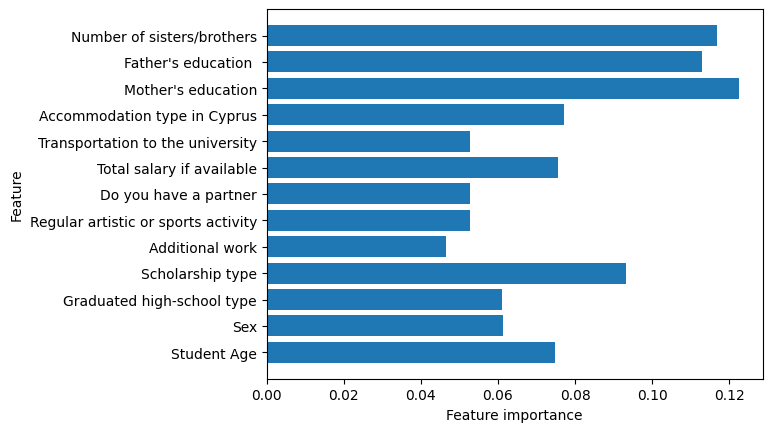

In [20]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# Calling the function to extract feature importance and passing the model named forest (constructed earlier) into it.
plot_feature_importances_heartattack(forest)

**Trying Boosting**

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

from sklearn.ensemble import GradientBoostingClassifier

# Creating an instance of the Gradient Boosting Classifier and varying parameters.
gbrt = GradientBoostingClassifier(n_estimators=200,max_depth=3,learning_rate=0.03,random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.243


In [22]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.657
Accuracy on test set: 0.162


In [23]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.741
Accuracy on test set: 0.243


13


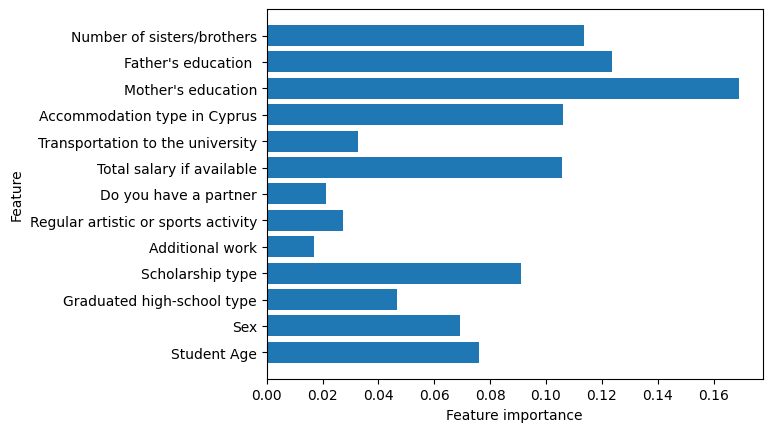

In [24]:
# Generating variable impotance

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_heartattack(gbrt)

**Comparing All of the Algorithms**

In [25]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Algorithms
models = []
models.append(( 'Naive Bayes' , GaussianNB()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'Decision Tree' , DecisionTreeClassifier()))
models.append(( 'RandomForestClassifier' , RandomForestClassifier()))
models.append(( 'MLPClassifier' , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=347288723)))

# Test options and evaluation metric
seed = 347288723
print('Student Performance dataset:\n')
# Create a list save results
results = []
# Create a list ot save model names
names = []
for name, model in models:
# create a kfold cross fold validation with 10 splits
  models_kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
 # passing each model into the cross validation for training
  cv_results = cross_val_score(model, X_train, np.ravel(y_train), cv=models_kfold)
 # passing each model into the cross validation for testing
  cv_results_testing = cross_val_score(model, X_test, np.ravel(y_test), cv=models_kfold)
 # Save the results
  results.append(cv_results)
 # Save the names
  names.append(name)
 # Print the results
  msg = "Training accuracy %s: %f %%" % (name, cv_results.mean()*100)
  print(msg)
  msg_testing = "Testing accuracy %s: %f %%" % (name, cv_results_testing.mean()*100)
  print(msg_testing)
print('10-Fold cross-validation accuracy score applied for the training data for 5 classifiers')

Student Performance dataset:

Training accuracy Naive Bayes: 17.727273 %
Testing accuracy Naive Bayes: 5.833333 %
Training accuracy KNN: 23.000000 %
Testing accuracy KNN: 14.166667 %
Training accuracy Decision Tree: 17.636364 %
Testing accuracy Decision Tree: 8.333333 %
Training accuracy RandomForestClassifier: 22.000000 %
Testing accuracy RandomForestClassifier: 16.666667 %
Training accuracy MLPClassifier: 23.181818 %
Testing accuracy MLPClassifier: 25.000000 %
10-Fold cross-validation accuracy score applied for the training data for 5 classifiers


**Pipelining**

In [26]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Pipelining the Standard Scaler, PCA and KNN
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier())])

# Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train)

# passing the model into cross validation
# n_jobs: The number of CPUs to use to do the computation. -1 means ‘all CPUs’.
scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)


print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Tune Hyperparameters. k number of neighbors
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn,
                    param_grid=param_grid,
                    cv=10,
                    scoring='accuracy')
gs_knn = grid.fit(X_train, y_train)
print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)

--> Model Training Accuracy: 0.111 +/- 0.113
--> Tuned Parameters Best Score:  0.21363636363636368
--> Best Parameters: 
 {'clf__n_neighbors': 29}


In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# define in the parameter values that should be search
# create a parameter grid:  map the parameter names to the value that should be search
param_grid = {
  'n_estimators': [ 25, 50, 100, 120, 150, 300],
  'max_features': ['auto', 'sqrt', 'log2']
}

# use out-of-bag samples ("oob_score= True") to estimate the generalization accuracy.
rfc = RandomForestClassifier(bootstrap= True, n_jobs=-1, oob_score= True)

# cv=10 in the GridSearchCV and initialize the grid
grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv=10, scoring ='accuracy')

# fit your data before you can get the best parameter combination.
grid_rfc.fit(X_train,y_train)
grid_rfc.cv_results_

{'mean_fit_time': array([0.27561305, 0.34140122, 0.24557025, 0.32742758, 0.42482305,
        0.76433704, 0.09502034, 0.15138237, 0.24835854, 0.2987762 ,
        0.40284128, 0.77275593, 0.07258947, 0.13193753, 0.31765125,
        0.30092905, 0.36861317, 0.78698487]),
 'std_fit_time': array([0.06920143, 0.10579561, 0.00538108, 0.05102021, 0.07546031,
        0.07793507, 0.00457684, 0.03188253, 0.01241558, 0.01256777,
        0.06073106, 0.0973895 , 0.00554051, 0.00574401, 0.03674503,
        0.02013642, 0.01165191, 0.10981903]),
 'mean_score_time': array([0.06014221, 0.05583367, 0.0262516 , 0.03213899, 0.03725441,
        0.06315219, 0.01646907, 0.01670372, 0.02685494, 0.04934545,
        0.03551042, 0.0639643 , 0.01648772, 0.01613848, 0.02899017,
        0.03465934, 0.03690479, 0.06470258]),
 'std_score_time': array([0.01069893, 0.02704257, 0.00053758, 0.00574489, 0.00473202,
        0.00734934, 0.0006472 , 0.00193441, 0.00028758, 0.05300952,
        0.00444711, 0.00843552, 0.00024183, 

In [28]:
# Best Model from Grid Search

print("GridSearhCV best model:\n ")
print('The best score: ', grid_rfc.best_score_)
print('The best parameter:', grid_rfc.best_params_)
print('The best model estimator:', grid_rfc.best_estimator_)

GridSearhCV best model:
 
The best score:  0.3218181818181819
The best parameter: {'max_features': 'sqrt', 'n_estimators': 100}
The best model estimator: RandomForestClassifier(n_jobs=-1, oob_score=True)


This output is saying that the best model found from all of the ones we ran is the Random Forest model

Accuracy on  RandomForest Classifier test data: 16.22 %
Confusion Matrix 
 [[0 1 0 0 1 0 0 0]
 [0 3 0 0 2 0 1 3]
 [0 4 0 0 0 1 1 0]
 [0 3 0 2 0 1 0 0]
 [1 0 2 0 0 0 0 0]
 [0 1 0 0 0 1 1 1]
 [0 2 0 0 0 1 0 0]
 [0 1 0 1 0 0 2 0]]


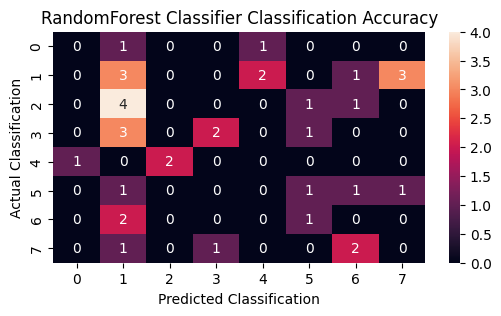

In [29]:
# Creating a confusion Matrix
rfc_model = RandomForestClassifier(n_estimators=120, bootstrap= True, n_jobs=-1, oob_score= True)
rfc_model.fit(X_train, y_train)
y_predicted_rfc = rfc_model.predict(X_test)
print("Accuracy on  RandomForest Classifier test data: {:.2f} %".format(rfc_model.score(X_test, y_test)*100))
cm = confusion_matrix(y_test, y_predicted_rfc)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('RandomForest Classifier Classification Accuracy')
plt.show()

The accuracy of all of my models are all quite low. I had a suspicion that 'Grade' was potenially not the best variable for this type of model because it has 8 different bins. So I decided to test it on 'Sex' instead, since it only has two bins in this dataset.

In [7]:
# Divide data into predictor features vector and the label of the trget variable 'Risk'
#studentdata = studentdata.drop('STUDENT ID', axis=1)
studentdata = studentdata.drop('STUDENT ID', axis=1)
X = pd.DataFrame(studentdata)
X = X.iloc[:,0:13]
y = studentdata['Sex']
#print(X)
#print(y)

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.tree import DecisionTreeClassifier

# Creating an instance of the Decision Tree
tree = DecisionTreeClassifier(random_state=0)
# Fiting the training data to the model
tree.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Confusion Matrix 
 [[10  0]
 [ 0 19]]


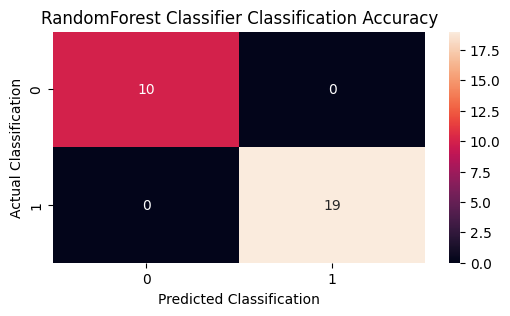

In [12]:
tree.fit(X_train, y_train)
y_predicted_rfc = tree.predict(X_test)
cm = confusion_matrix(y_test, y_predicted_rfc)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('RandomForest Classifier Classification Accuracy')
plt.show()

Running the model on Sex had a 100% accuracy rate.



Conclusion

  1. This project has found that a Decision Trees alogrithm prediting a student's grade had an accuracy rate of 16.22% after conducting a performance evaluation. After thinking through the model and running it on a variable that seemed more appropriate for Decision Trees, a model predicting Sex had an accuracy rate of 100%.

  2. In the decision trees lecture, it was discussed that this algorithm does not work well for datasets that have too many sub-branches. I believe that this was the weakness of my model predicting student's grades. When I switched to predicting student's sex, I had a much higher accuracy rate.

  3. I found an article that shows the methods of using the decision tree classifier on student's grades. In the data prep, they took the student's raw scores out of 100 and sorted them into three different bins: 'Pass', 'Redo', and 'Retake'. I think this further shows that having 8 bins in my dataset for grades was working against me. In the future, if I wanted to predict grades using decision trees, I need to sort my data into smaller bins. I think it would be preferable to do that with a dataset that includes raw scores, like the one from this article. My current dataset just shows a nummber from 0-7 for grades, and while I could techinally put those into smaller bins, I think my results wouldn't be as interpretable, I wouldn'y be able to explain what the bins mean as well as if I had started with raw scores.

  Bayya, R. (2019, December 20). Machine learning algorithm for student grade prediction and visualization using decision tree. Medium. https://medium.com/analytics-vidhya/machine-learning-algorithm-for-student-grade-prediction-and-visualization-using-decision-tree-7bfeb10c2ee8

  4. I think that it would be interesting to try and use a different machine learning algorthim and compare the accuracy rates to decision trees. The decision trees algorithm had a lower accuracy than the Naive Bayes. It has been really helpful so far to run the same dataset through multiple algorithms. It has really helped me identify the differences between them. Additionally, it could be interesting to find a different dataset of student performance that has more numeric data and doesn't group the data into bins for each variable like this one does. Then I could get practice putting data into bins myself, like I would if I were running this type of model on data that I collected from my job.

